In [2]:
from __future__ import division

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
# import seaborn as sns

%matplotlib inline

# 1. Работа с массивами NumPy

**N. Все упражнения ниже нужно делать без использования циклов Python**

**1.** Cоздать вектор

$$(2, \frac{2^2}{2}, \ldots, \frac{2^{20}}{20})$$

Можно использовать функции [np.arange()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html), [np.ones()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html)

In [4]:
## your code
p = np.arange(1, 21)
2**p / p

array([  2.00000000e+00,   2.00000000e+00,   2.66666667e+00,
         4.00000000e+00,   6.40000000e+00,   1.06666667e+01,
         1.82857143e+01,   3.20000000e+01,   5.68888889e+01,
         1.02400000e+02,   1.86181818e+02,   3.41333333e+02,
         6.30153846e+02,   1.17028571e+03,   2.18453333e+03,
         4.09600000e+03,   7.71011765e+03,   1.45635556e+04,
         2.75941053e+04,   5.24288000e+04])

**2.** Посчитать:

$$\sum\limits_{i=0}^{5}{0.1^{3i}0.2^{4i}}$$


In [5]:
## your code
i = np.arange(6)
(0.1**(3*i) * 0.2**(4*i)).sum()

1.00000160000256

**3.** Создать нулевую матрицe $8 \times 8$, и заполнить её единицами в шахматном порядке.

In [6]:
## your code
m = np.zeros((8,8))
m[::2, ::2] = 1
m[1::2, 1::2] = 1

m

array([[ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.]])

**4.** Есть 5 точек в декартовой системе координат (в виде матрицы $X$ размерностью $5 \times 2$), сконвертируйте эти точки в полярную систему координат.

In [7]:
X = np.random.random((5, 2))

## your code
x, y = X.T
r = np.sqrt(x**2 + y**2)
fi = np.arctan2(y, x)
fi *= 180 / np.pi
P = np.asarray([r, fi]).T

X, P

(array([[ 0.92536201,  0.28411987],
        [ 0.910525  ,  0.65264649],
        [ 0.70568169,  0.67312107],
        [ 0.26557489,  0.38977373],
        [ 0.43299304,  0.90384615]]), array([[  0.96799739,  17.06839472],
        [  1.12026926,  35.63221318],
        [  0.9752326 ,  43.64720343],
        [  0.47164985,  55.73118229],
        [  1.00220798,  64.40296332]]))

**5.** Найдите индексы максимального элемента в случайной матрице $10 \times 10$.

Cм. [np.argmax()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html).

True

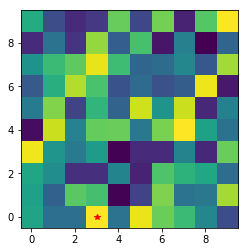

In [8]:
X = np.random.random((10, 10))

## your code
row = X.max(axis=1).argmax()
col = X[row].argmax()

plt.imshow(X, origin="lower")
plt.plot([col], [row], "*", color="red");

np.allclose(X.max(), X[row][col])

**6.** Есть 10 точек ($X$) и ещё одна ($y$). Найти в $X$ ближайшую к $y$ точку.

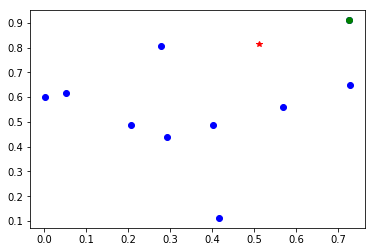

In [10]:
X = np.random.random((10, 2))
y = np.random.random((1, 2))

## your code
d = np.sqrt(((X - y)**2).sum(1))
nearest_idx = d.argmin()
nearest_point = X[nearest_idx]

plt.plot(X.T[0], X.T[1], "o", color="blue");
plt.plot([nearest_point[0]], [nearest_point[1]], "o", color="green");
plt.plot([y[0][0]], [y[0][1]], "*", color="red");

**7.** Дана функция:

$$
 \begin{cases}
    x^2 + 2x + 6, & x < 0  \\
    x + 6, & 0 \le x \le 2 \\
    x^2 + 4x - 4, & x \ge 2
 \end{cases}
$$

Постройте массив из её значений на  $-3 \le x \le 3$.

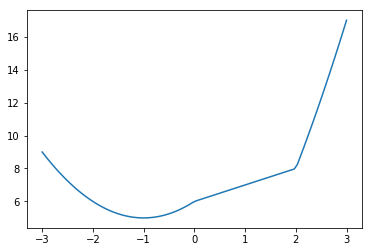

In [7]:
## your code
x = np.linspace(-3, 3, 100)
y = x**2 + 2*x + 6
m = (x >= 0)
y[m] = x[m] + 6
m = (x >= 2)
y[m] = x[m]**2 + 4 * x[m] - 4

plt.plot(x, y);

**8.** Из каждого элемента матрицы вычесть среднее арифметическое от всех элементов в соответствующей строке (после чего среднее значение каждой строки должно равняться нулю).

Cм. [np.mean()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html).

In [6]:
X = np.random.random((10, 10))

## your code
mean = X.mean(axis=1, keepdims=True)
X -= mean

np.allclose(X.mean(axis=1), 0.0)

True

**9.** Есть массив из 1000 чисел, полученных из генератора случайных чисел, имеющий нормальное распределение. Посчитайте выборочное среднее и выборочную дисперсию. 

In [5]:
X = np.random.normal(loc=5, scale=2., size=1000)
mean = X.mean()
var = X.var()

mean, var

(5.0272322126305999, 4.1456321853435592)

**10.** Создать матрицу:

$$
\begin{pmatrix}
0 & 1 & 2 & 3 & 4 \\
1 & 2 & 3 & 4 & 0 \\
2 & 3 & 4 & 0 & 1 \\
3 & 4 & 0 & 1 & 2 \\
4 & 0 & 1 & 2 & 3
\end{pmatrix}
$$

In [4]:
## your code
x = np.arange(5).reshape(1, -1)
y = np.arange(5).reshape(-1, 1)
M = (x + y) % 5

M

array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 0],
       [2, 3, 4, 0, 1],
       [3, 4, 0, 1, 2],
       [4, 0, 1, 2, 3]])